In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('TEMP_ANNUAL_SEASONAL_MEAN.csv')

In [11]:
df.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13


In [12]:
!pip install matplotlib seaborn

Data loaded successfully!
     YEAR  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC
0  1901.0   25.42    20.11    27.64    28.16    23.10
1  1902.0   25.42    20.88    27.96    27.98    22.51
2  1903.0   25.01    19.99    27.02    28.00    22.33
3  1904.0   24.93    19.76    27.23    27.57    22.56
4  1905.0   24.84    18.36    26.38    28.20    23.13

Data types:
YEAR       float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object


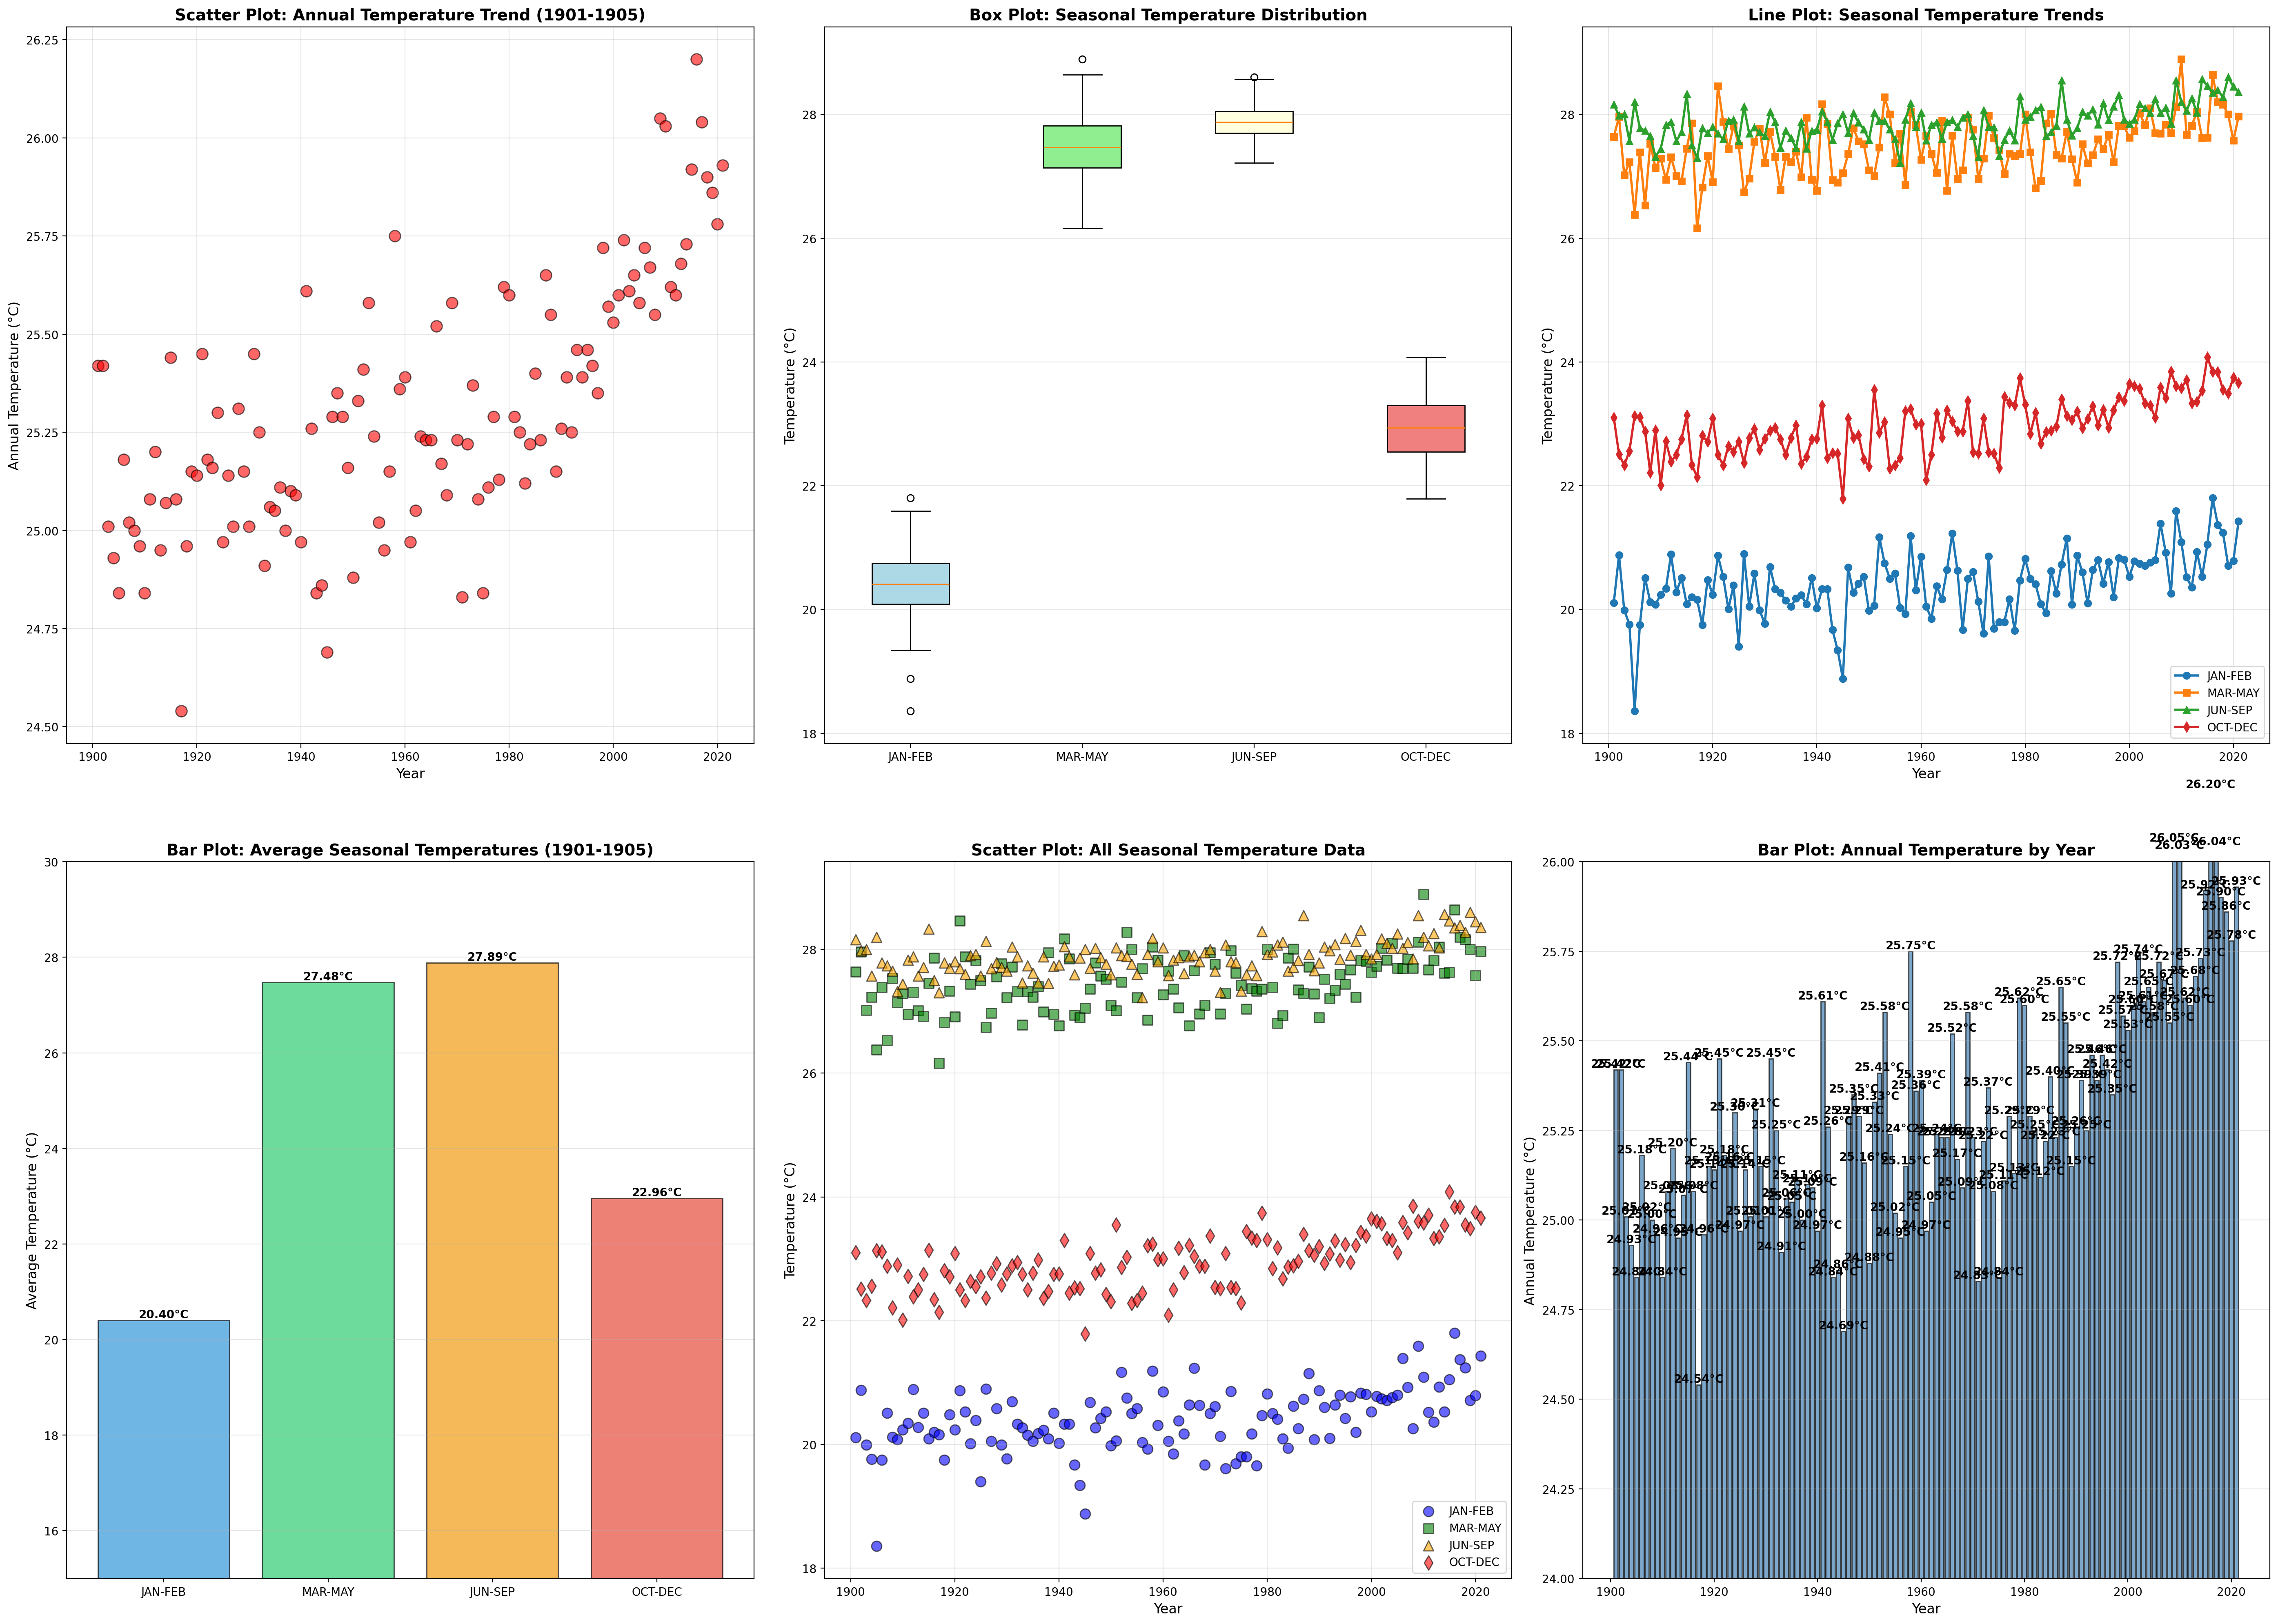


CLIMATE DATA ANALYSIS SUMMARY (1901-1905)

1. ANNUAL TEMPERATURE STATISTICS:
   Mean: 25.30°C
   Std Dev: 0.32°C
   Min: 24.54°C (Year: 1917)
   Max: 26.20°C (Year: 2016)

2. SEASONAL TEMPERATURE AVERAGES:
   JAN-FEB: 20.40°C
   MAR-MAY: 27.48°C
   JUN-SEP: 27.89°C
   OCT-DEC: 22.96°C

3. HOTTEST SEASON: JUN-SEP (Monsoon/Summer)
   Average: 27.89°C

4. COOLEST SEASON: JAN-FEB (Winter)
   Average: 20.40°C

5. TEMPERATURE TREND:
   Change from 1901 to 1905: nan°C
   Trend: Increasing



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Ensure all columns are numeric
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['ANNUAL'] = pd.to_numeric(df['ANNUAL'], errors='coerce')
df['JAN-FEB'] = pd.to_numeric(df['JAN-FEB'], errors='coerce')
df['MAR-MAY'] = pd.to_numeric(df['MAR-MAY'], errors='coerce')
df['JUN-SEP'] = pd.to_numeric(df['JUN-SEP'], errors='coerce')
df['OCT-DEC'] = pd.to_numeric(df['OCT-DEC'], errors='coerce')

print("Data loaded successfully!")
print(df.head())
print("\nData types:")
print(df.dtypes)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(28, 20), dpi=200)
# 1. SCATTER PLOT - Annual Temperature vs Year
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(df['YEAR'].values, df['ANNUAL'].values, color='red', s=100, alpha=0.6, edgecolors='black')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Annual Temperature (°C)', fontsize=12)
ax1.set_title('Scatter Plot: Annual Temperature Trend (1901-1905)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. BOX PLOT - Seasonal Temperature Distribution
# 2. BOX PLOT - Seasonal Temperature Distribution
ax2 = plt.subplot(2, 3, 2)
seasonal_data = [
    df['JAN-FEB'].dropna().values,
    df['MAR-MAY'].dropna().values,
    df['JUN-SEP'].dropna().values,
    df['OCT-DEC'].dropna().values
]

box = ax2.boxplot(seasonal_data, tick_labels=['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'],
                   patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Temperature (°C)', fontsize=12)
ax2.set_title('Box Plot: Seasonal Temperature Distribution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')


# 3. LINE PLOT - Seasonal Temperature Trends
ax3 = plt.subplot(2, 3, 3)
ax3.plot(df['YEAR'].values, df['JAN-FEB'].values, marker='o', label='JAN-FEB', linewidth=2)
ax3.plot(df['YEAR'].values, df['MAR-MAY'].values, marker='s', label='MAR-MAY', linewidth=2)
ax3.plot(df['YEAR'].values, df['JUN-SEP'].values, marker='^', label='JUN-SEP', linewidth=2)
ax3.plot(df['YEAR'].values, df['OCT-DEC'].values, marker='d', label='OCT-DEC', linewidth=2)
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Temperature (°C)', fontsize=12)
ax3.set_title('Line Plot: Seasonal Temperature Trends', fontsize=14, fontweight='bold')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)

# 4. BAR PLOT - Average Seasonal Temperatures
ax4 = plt.subplot(2, 3, 4)
seasons = ['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']
avg_temps = [df['JAN-FEB'].mean(), df['MAR-MAY'].mean(), 
             df['JUN-SEP'].mean(), df['OCT-DEC'].mean()]
bar_colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
bars = ax4.bar(seasons, avg_temps, color=bar_colors, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Average Temperature (°C)', fontsize=12)
ax4.set_title('Bar Plot: Average Seasonal Temperatures (1901-1905)', fontsize=14, fontweight='bold')
ax4.set_ylim(15, 30)
for bar, temp in zip(bars, avg_temps):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{temp:.2f}°C', ha='center', va='bottom', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# 5. SCATTER PLOT - All Seasonal Data Points
ax5 = plt.subplot(2, 3, 5)
scatter_colors = ['blue', 'green', 'orange', 'red']
markers = ['o', 's', '^', 'd']
for i, (season, color, marker) in enumerate(zip(['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'],
                                                  scatter_colors, markers)):
    ax5.scatter(df['YEAR'].values, df[season].values, label=season, color=color, s=80, 
                marker=marker, alpha=0.6, edgecolors='black')
ax5.set_xlabel('Year', fontsize=12)
ax5.set_ylabel('Temperature (°C)', fontsize=12)
ax5.set_title('Scatter Plot: All Seasonal Temperature Data', fontsize=14, fontweight='bold')
ax5.legend(loc='best')
ax5.grid(True, alpha=0.3)

# 6. BAR PLOT - Annual Temperature by Year
ax6 = plt.subplot(2, 3, 6)
ax6.bar(df['YEAR'].values, df['ANNUAL'].values, color='steelblue', alpha=0.7, edgecolor='black')
ax6.set_xlabel('Year', fontsize=12)
ax6.set_ylabel('Annual Temperature (°C)', fontsize=12)
ax6.set_title('Bar Plot: Annual Temperature by Year', fontsize=14, fontweight='bold')
ax6.set_ylim(24, 26)
for year, temp in zip(df['YEAR'].values, df['ANNUAL'].values):
    ax6.text(year, temp, f'{temp:.2f}°C', ha='center', va='bottom', fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('climate_analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Print Statistical Summary
print("\n" + "=" * 60)
print("CLIMATE DATA ANALYSIS SUMMARY (1901-1905)")
print("=" * 60)
print("\n1. ANNUAL TEMPERATURE STATISTICS:")
print(f"   Mean: {df['ANNUAL'].mean():.2f}°C")
print(f"   Std Dev: {df['ANNUAL'].std():.2f}°C")
print(f"   Min: {df['ANNUAL'].min():.2f}°C (Year: {df.loc[df['ANNUAL'].idxmin(), 'YEAR']:.0f})")
print(f"   Max: {df['ANNUAL'].max():.2f}°C (Year: {df.loc[df['ANNUAL'].idxmax(), 'YEAR']:.0f})")

print("\n2. SEASONAL TEMPERATURE AVERAGES:")
for season in ['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']:
    print(f"   {season}: {df[season].mean():.2f}°C")

print("\n3. HOTTEST SEASON: JUN-SEP (Monsoon/Summer)")
print(f"   Average: {df['JUN-SEP'].mean():.2f}°C")

print("\n4. COOLEST SEASON: JAN-FEB (Winter)")
print(f"   Average: {df['JAN-FEB'].mean():.2f}°C")

print("\n5. TEMPERATURE TREND:")
temp_change = df['ANNUAL'].iloc[-1] - df['ANNUAL'].iloc[0]
print(f"   Change from 1901 to 1905: {temp_change:.2f}°C")
print(f"   Trend: {'Decreasing' if temp_change < 0 else 'Increasing'}")

print("\n" + "=" * 60)